Base de datos original: https://www.kaggle.com/datasets/tsiaras/uk-road-safety-accidents-and-vehicles?select=Accident_Information.csv

Luego se usa toda la data de 2016

(136621, 33)
Accident_Index       - 0
1st_Road_Class       - 0
1st_Road_Number      - 0
2nd_Road_Class       - 0
2nd_Road_Number      - 617
Accident_Severity    - 0
Carriageway_Hazards  - 0
Date                 - 0
Day_of_Week          - 0
Did_Police_Officer_A - 0
Junction_Control     - 0
Junction_Detail      - 0
Latitude             - 7
Light_Conditions     - 0
Local_Authority_(Dis - 0
Local_Authority_(Hig - 0
Location_Easting_OSG - 7
Location_Northing_OS - 7
Longitude            - 7
LSOA_of_Accident_Loc - 0
Number_of_Casualties - 0
Number_of_Vehicles   - 0
Pedestrian_Crossing- - 185
Pedestrian_Crossing- - 631
Police_Force         - 0
Road_Surface_Conditi - 0
Road_Type            - 0
Special_Conditions_a - 0
Speed_limit          - 37
Time                 - 0
Urban_or_Rural_Area  - 0
Weather_Conditions   - 0
InScotland           - 0
(252500, 23)
Accident_Index 0
Age_Band_of_Driver 0
Age_of_Vehicle 68175
Driver_Home_Area_Type 0
Driver_IMD_Decile 67565
Engine_Capacity_.CC. 58780
Hit_Obje

C:\Users\franc\AppData\Local\Temp\ipykernel_15564\437518133.py:89: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_encoded['Hour'] = pd.to_datetime(subset_30['Time'], errors='coerce').dt.hour


Pares de variables con correlación > 95%:

Latitude se correlaciona con Location_Northing_OSGR en un 100.00%
Location_Easting_OSGR se correlaciona con Longitude en un 99.94%
Accident_Severity_Serious se correlaciona con Accident_Severity_Slight en un 95.55%
Did_Police_Officer_Attend_Scene_of_Accident_No se correlaciona con Did_Police_Officer_Attend_Scene_of_Accident_Yes en un 100.00%
2nd_Road_Class_- se correlaciona con Junction_Control_Data missing or out of range en un 98.99%
2nd_Road_Class_- se correlaciona con Junction_Detail_Not at junction or within 20 metres en un 99.99%
Junction_Control_Data missing or out of range se correlaciona con Junction_Detail_Not at junction or within 20 metres en un 99.00%
Road_Surface_Conditions_Dry se correlaciona con Road_Surface_Conditions_Wet or damp en un 95.20%
Urban_or_Rural_Area_Rural se correlaciona con Urban_or_Rural_Area_Urban en un 100.00%
Light_Conditions_Data missing or out of range se correlaciona con Weather_Conditions_Data missing or 

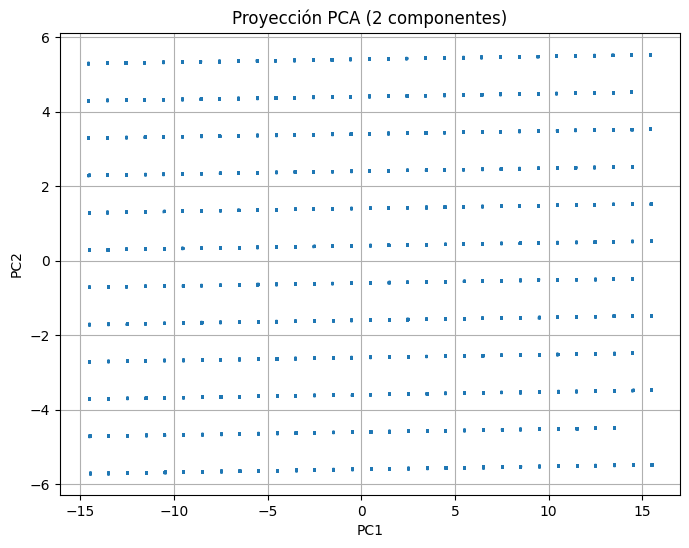

Aplicando PCA

Aplicando t-SNE



C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Aplicando UMAP



C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


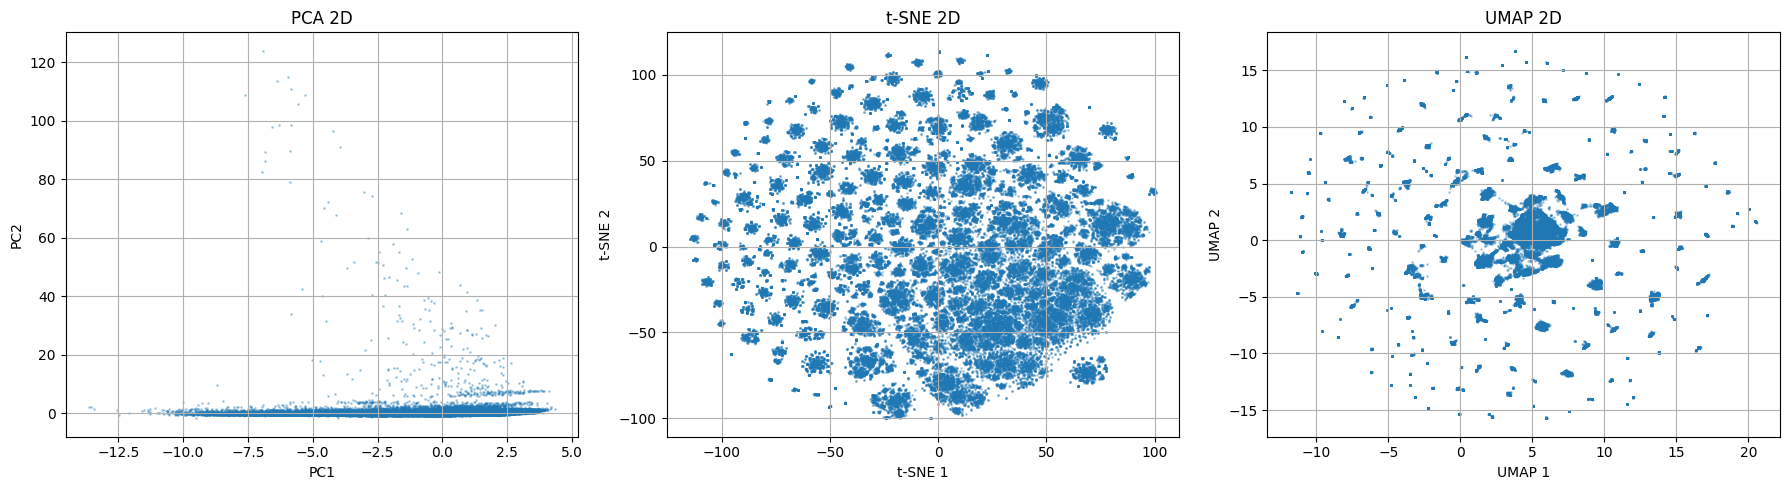

74812
74813
74812 74812


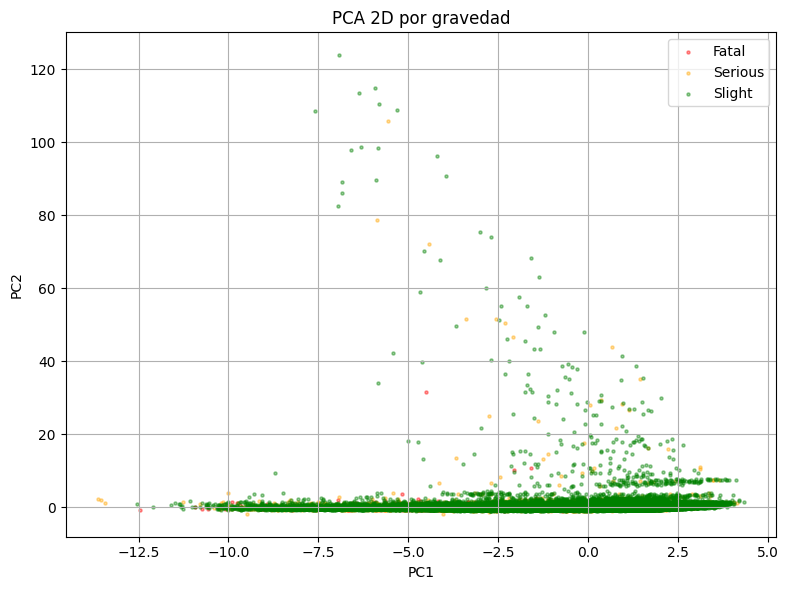

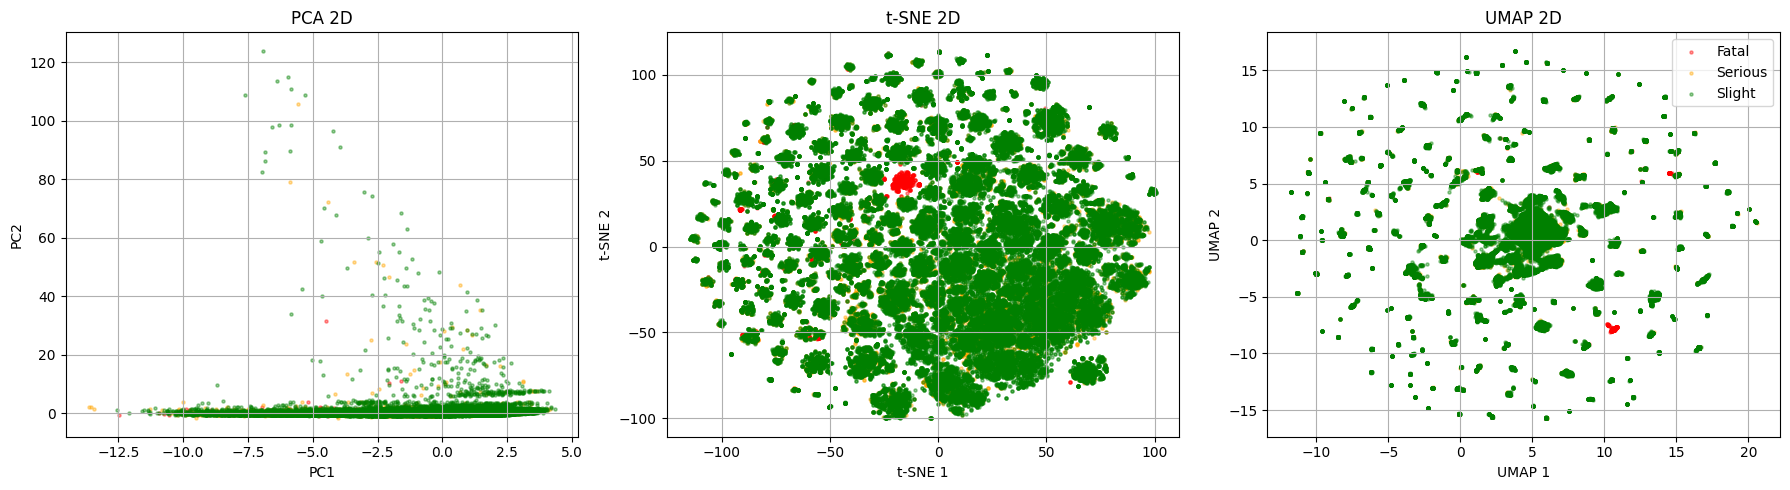

Nº componentes PCA (95% varianza): 189


C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

accidentes = pd.read_csv('accidentes.csv')
vehiculos = pd.read_csv('vehiculos.csv')

print(accidentes.shape)
for i in accidentes.columns:
    print(f"{i[:20]:<20} - {accidentes[i].isnull().sum()}")

print(vehiculos.shape)
for i in vehiculos.columns:
    print(i, vehiculos[i].isnull().sum())

### Merge by Accident_Index
accidentes_vehiculos = pd.merge(accidentes, vehiculos, on='Accident_Index', how='inner')

print(accidentes_vehiculos.shape)
drop = []
for i in accidentes_vehiculos.columns:
    print(i, accidentes_vehiculos[i].isnull().sum())
    if accidentes_vehiculos[i].isnull().sum() > 0 and accidentes_vehiculos[i].isnull().sum() < 1210:
        drop.append(i)


### Remove duplicates
accidentes_vehiculos = accidentes_vehiculos.drop_duplicates(subset=['Accident_Index', 'Vehicle_Reference'], keep='first')

### Remove Nulls
accidentes_vehiculos = accidentes_vehiculos.dropna(subset=drop)

print(accidentes_vehiculos.shape)
for i in accidentes_vehiculos.columns:
    print(i, accidentes_vehiculos[i].isnull().sum())


### Remove columns with more than 1000 nulls
drop = []
for i in accidentes_vehiculos.columns:
    if accidentes_vehiculos[i].isnull().sum() > 1200:
        drop.append(i)
print(drop)

accidentes_vehiculos.drop(columns=drop, inplace=True)
print(accidentes_vehiculos.shape)

print(accidentes_vehiculos.shape)
for i in accidentes_vehiculos.columns:
    print(f"{i[:20]:<20} - {accidentes_vehiculos[i].isnull().sum():<3} - {str(accidentes_vehiculos[i].dtype):<8} - {accidentes_vehiculos[i].nunique()}")

accidentes_vehiculos.drop(columns=['Accident_Index', 'Vehicle_Reference'], inplace=True)
accidentes_vehiculos = accidentes_vehiculos.drop_duplicates()

accidentes_vehiculos.shape

# Muestreo estratificado del 30% según la columna 'Accident_Severity'
subset_30, _ = train_test_split(
    accidentes_vehiculos,
    train_size=0.3,
    stratify=accidentes_vehiculos['Accident_Severity'],
    random_state=42
)

print(subset_30.shape)
print(subset_30['Accident_Severity'].value_counts(normalize=True))
print(accidentes_vehiculos['Accident_Severity'].value_counts(normalize=True))  # para comparar proporciones


# Copia del dataframe
df_encoded = subset_30.copy()

# Eliminar columnas innecesarias por alta cardinalidad o redundancia ---
cols_to_drop = [
    'model',  # 20501 categorías
    'LSOA_of_Accident_Location',  # 28575 categorías ## Importante, pero dificil de manejar
    'Date',  # reemplazada por día/mes
    'Time'  # reemplazada por hora
]
df_encoded.drop(columns=cols_to_drop, inplace=True)

# Extraer información útil de 'Date' y 'Time'
df_encoded['Hour'] = pd.to_datetime(subset_30['Time'], errors='coerce').dt.hour
df_encoded['Month'] = pd.to_datetime(subset_30['Date'], errors='coerce').dt.month
df_encoded['Day'] = pd.to_datetime(subset_30['Date'], errors='coerce').dt.day

# Separar columnas categóricas 
cat_cols = df_encoded.select_dtypes(include='object').columns.tolist()

# Dividir por cardinalidad
high_card_cols = [col for col in cat_cols if df_encoded[col].nunique() > 21]
low_card_cols = [col for col in cat_cols if col not in high_card_cols]

# One-hot encoding para baja cardinalidad 
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_low = encoder.fit_transform(df_encoded[low_card_cols])
encoded_low_df = pd.DataFrame(encoded_low, columns=encoder.get_feature_names_out(low_card_cols), index=df_encoded.index)

# Factorizar alta cardinalidad
for col in high_card_cols:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

# Combinar todo 
df_encoded.drop(columns=low_card_cols, inplace=True)
df_final = pd.concat([df_encoded, encoded_low_df], axis=1)

# Normalizar
num_cols = df_final.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_final[num_cols] = scaler.fit_transform(df_final[num_cols])

# df_final es el DataFrame listo para usar



corr_matrix = df_final.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

print("Pares de variables con correlación > 95%:\n")
for col in upper.columns:
    for row in upper.index:
        corr_value = upper.loc[row, col]
        if pd.notnull(corr_value) and corr_value > 0.95:
            print(f"{row} se correlaciona con {col} en un {corr_value*100:.2f}%")


cols_to_drop = [
    'Local_Authority_(Highway)',       # porque correlaciona con Local_Authority_(District)
    'Location_Northing_OSGR',           # correlaciona 100% con Latitude
    'Location_Easting_OSGR',            # correlaciona casi 100% con Longitude
    'Police_Force',                     # correlaciona con Local_Authority_(District) y (Highway)
    
    # Variables binarias que son complementarias, basta con dejar una:
    'Accident_Severity_Slight',         # correlaciona 95.55% con Accident_Severity_Serious (usa solo una)
    'Did_Police_Officer_Attend_Scene_of_Accident_Yes',  # complemento exacto de No
    
    # Variables categóricas one-hot con columnas mutuamente excluyentes:
    'Junction_Control_Data missing or out of range',
    'Junction_Detail_Not at junction or within 20 metres',
    'Junction_Location_Not at or within 20 metres of junction',
    '2nd_Road_Class_-',
    
    # Variables mutuamente excluyentes:
    'Road_Surface_Conditions_Wet or damp',  # correlaciona 95.27% con Dry (usa solo una)
    'Urban_or_Rural_Area_Urban',            # complementa Rural
    'InScotland_Yes'                        # complementa No
]

# Verificar que las columnas existen antes de eliminarlas
cols_to_drop = [col for col in cols_to_drop if col in df_final.columns]
df_final_reduced = df_final.drop(columns=cols_to_drop)



df_cleaned = df_final_reduced.dropna(axis=0, how='any')
print(df_cleaned.shape)


pca = PCA(n_components=0.95)
pca.fit(df_cleaned)
df_pca = pca.transform(df_cleaned)
print(df_pca.shape)



pca2d = PCA(n_components=2)
df_pca_2d = pca2d.fit_transform(df_cleaned)
print(df_cleaned.isna().sum().sum())

plt.figure(figsize=(8,6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], alpha=0.3, s=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección PCA (2 componentes)')
plt.grid(True)
plt.show()


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)
print("Aplicando PCA\n")
# PCA 2D
pca = PCA(n_components=2)
df_pca_2d = pca.fit_transform(df_scaled)
# t-SNE 2D
print("Aplicando t-SNE\n")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
df_tsne_2d = tsne.fit_transform(df_scaled)

# UMAP 2D
print("Aplicando UMAP\n")
reducer = umap.UMAP(n_components=2, random_state=42)
df_umap_2d = reducer.fit_transform(df_scaled)

# Graficar los tres resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], alpha=0.3, s=1)
axes[0].set_title('PCA 2D')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True)

axes[1].scatter(df_tsne_2d[:, 0], df_tsne_2d[:, 1], alpha=0.3, s=1)
axes[1].set_title('t-SNE 2D')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].grid(True)

axes[2].scatter(df_umap_2d[:, 0], df_umap_2d[:, 1], alpha=0.3, s=1)
axes[2].set_title('UMAP 2D')
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Guardar etiquetas originales antes de cualquier transformación
labels = subset_30['Accident_Severity'].copy()


print(df_pca_2d.shape[0])  # Debería ser igual a len(labels)
print(len(labels))         # ¿Coinciden?

labels = subset_30.loc[df_cleaned.index, 'Accident_Severity']

print(len(df_cleaned), len(labels))  # ambos dan 74812

# Asegurarse de que las dimensiones coincidan
df_pca_2d = PCA(n_components=2).fit_transform(df_scaled)
labels = subset_30.loc[df_cleaned.index, 'Accident_Severity']

fig, axes = plt.subplots(1, 1, figsize=(8, 6))

label_names = {'Slight': 'Slight', 'Serious': 'Serious', 'Fatal': 'Fatal'}
color_dict = {'Slight': 'green', 'Serious': 'orange', 'Fatal': 'red'}


for label in sorted(labels.unique()):
    idx = labels == label
    axes.scatter(df_pca_2d[idx, 0], df_pca_2d[idx, 1], alpha=0.4, s=5, label=label_names[label], color=color_dict[label])

axes.set_title('PCA 2D por gravedad')
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.grid(True)
axes.legend()
plt.tight_layout()
plt.show()




fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA
for label in sorted(labels.unique()):
    idx = labels == label
    axes[0].scatter(df_pca_2d[idx, 0], df_pca_2d[idx, 1], alpha=0.4, s=5, label=label_names[label], color=color_dict[label])
axes[0].set_title('PCA 2D')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True)

# t-SNE
for label in sorted(labels.unique()):
    idx = labels == label
    axes[1].scatter(df_tsne_2d[idx, 0], df_tsne_2d[idx, 1], alpha=0.4, s=5, label=label_names[label], color=color_dict[label])
axes[1].set_title('t-SNE 2D')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].grid(True)

# UMAP
for label in sorted(labels.unique()):
    idx = labels == label
    axes[2].scatter(df_umap_2d[idx, 0], df_umap_2d[idx, 1], alpha=0.4, s=5, label=label_names[label], color=color_dict[label])
axes[2].set_title('UMAP 2D')
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
axes[2].grid(True)

plt.legend()
plt.tight_layout()
plt.show()


pca_full = PCA(n_components=0.95, random_state=42)
X_pca_95 = pca_full.fit_transform(df_scaled)
print(f"Nº componentes PCA (95% varianza): {X_pca_95.shape[1]}")

umap_equiv_pca = umap.UMAP(n_components=X_pca_95.shape[1], random_state=42)
X_umap_95 = umap_equiv_pca.fit_transform(df_scaled)

Evaluando K-means en PCA...


100%|██████████| 11/11 [20:31<00:00, 111.99s/it]


Evaluando K-means en UMAP...


100%|██████████| 11/11 [28:39<00:00, 156.34s/it]


Mejor K-means PCA: k=110, Silhouette=0.0700
Mejor K-means UMAP: k=120, Silhouette=0.6776


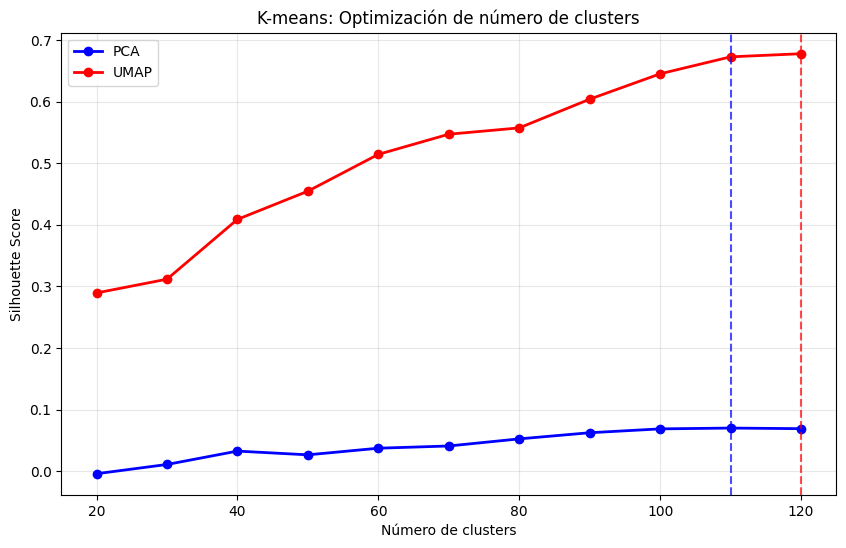


Top 5 K-means PCA:
      k  silhouette
9   110    0.070004
10  120    0.069003
8   100    0.068683
7    90    0.062415
6    80    0.052468

Top 5 K-means UMAP:
      k  silhouette
10  120    0.677557
9   110    0.672507
8   100    0.644961
7    90    0.603773
6    80    0.557185


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# K-means optimization
k_range = range(20, 125, 10)

# K-means en PCA
print("Evaluando K-means en PCA...")
kmeans_pca_results = []
for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca_95)
    sil_score = silhouette_score(X_pca_95, labels)
    kmeans_pca_results.append({'k': k, 'silhouette': sil_score, 'labels': labels})

kmeans_pca_df = pd.DataFrame(kmeans_pca_results)
best_k_pca = kmeans_pca_df.loc[kmeans_pca_df['silhouette'].idxmax()]

# K-means en UMAP
print("Evaluando K-means en UMAP...")
kmeans_umap_results = []
for k in tqdm(k_range):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_umap_95)
    sil_score = silhouette_score(X_umap_95, labels)
    kmeans_umap_results.append({'k': k, 'silhouette': sil_score, 'labels': labels})

kmeans_umap_df = pd.DataFrame(kmeans_umap_results)
best_k_umap = kmeans_umap_df.loc[kmeans_umap_df['silhouette'].idxmax()]

# Resultados
print(f"Mejor K-means PCA: k={int(best_k_pca['k'])}, Silhouette={best_k_pca['silhouette']:.4f}")
print(f"Mejor K-means UMAP: k={int(best_k_umap['k'])}, Silhouette={best_k_umap['silhouette']:.4f}")

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(kmeans_pca_df['k'], kmeans_pca_df['silhouette'], 'b-o', label='PCA', linewidth=2)
plt.plot(kmeans_umap_df['k'], kmeans_umap_df['silhouette'], 'r-o', label='UMAP', linewidth=2)
plt.axvline(best_k_pca['k'], color='blue', linestyle='--', alpha=0.7)
plt.axvline(best_k_umap['k'], color='red', linestyle='--', alpha=0.7)
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('K-means: Optimización de número de clusters')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Top 5 mejores configuraciones por método
print("\nTop 5 K-means PCA:")
print(kmeans_pca_df.sort_values('silhouette', ascending=False).head()[['k', 'silhouette']])

print("\nTop 5 K-means UMAP:")
print(kmeans_umap_df.sort_values('silhouette', ascending=False).head()[['k', 'silhouette']])

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


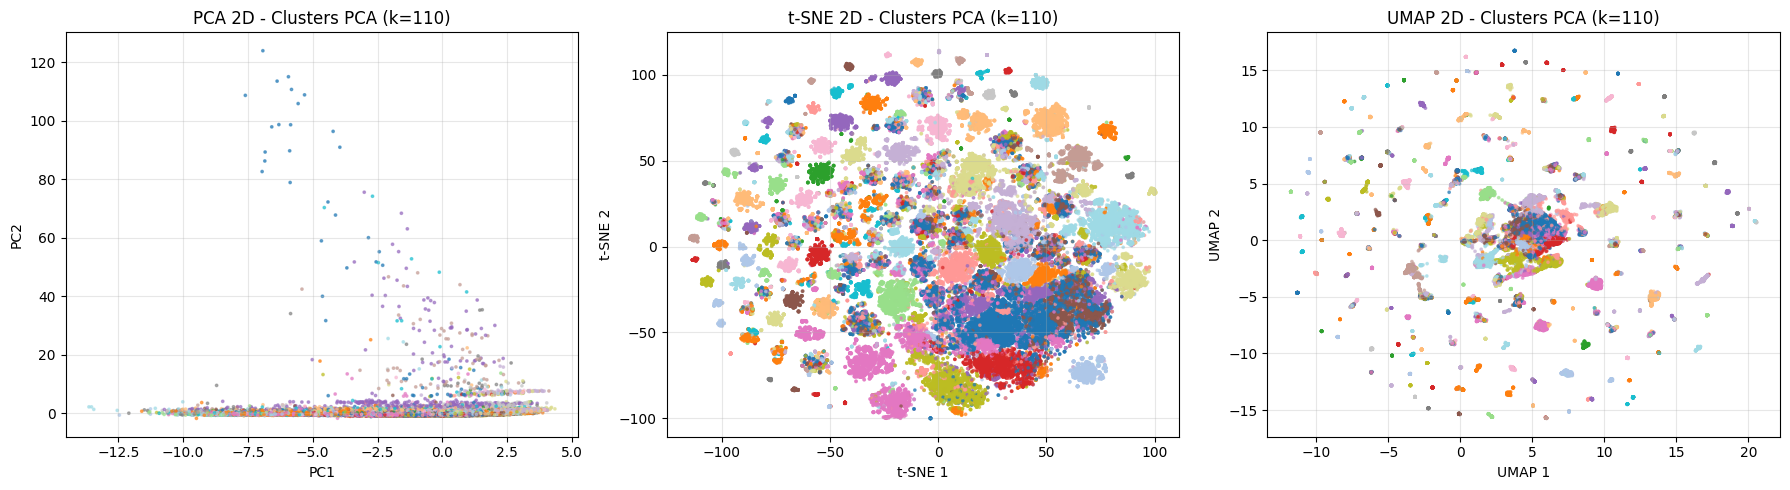

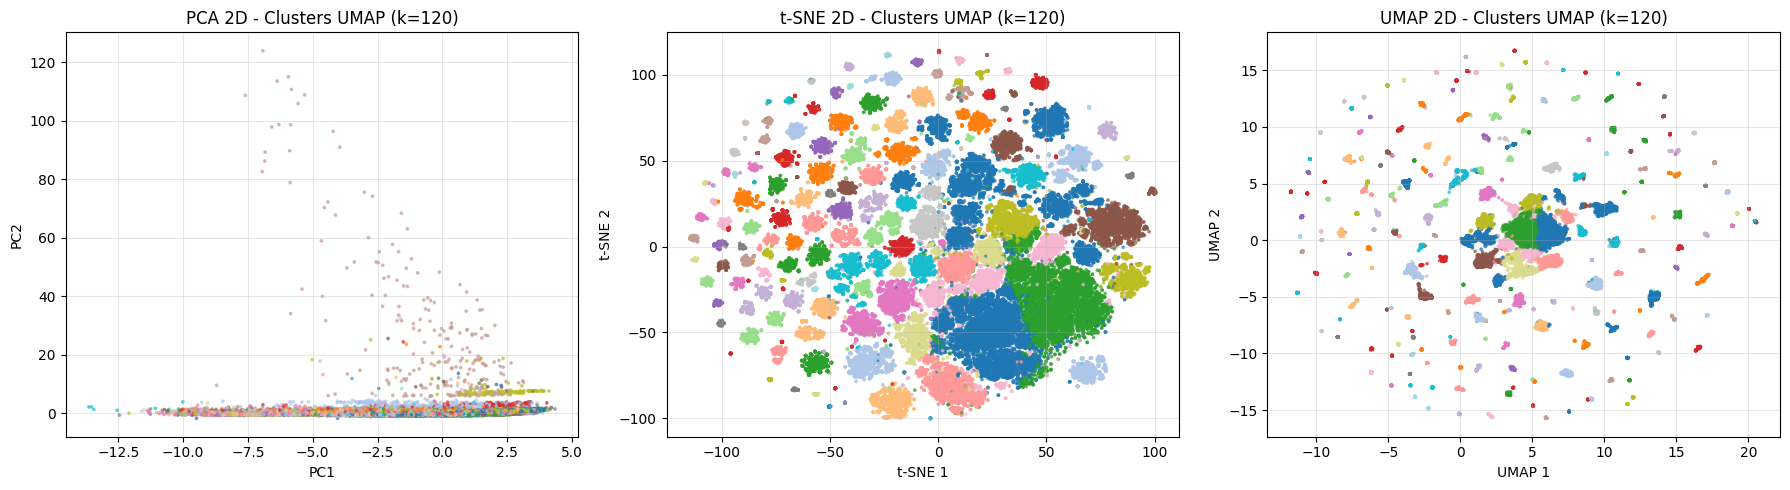

ESTADÍSTICAS DE CLUSTERS
----------------------------------------
Clusters PCA (k=110):
Tamaño promedio: 680.1
Tamaño mínimo: 1
Tamaño máximo: 5794
Desviación estándar: 1012.2

Clusters UMAP (k=120):
Tamaño promedio: 623.4
Tamaño mínimo: 26
Tamaño máximo: 7293
Desviación estándar: 1065.8


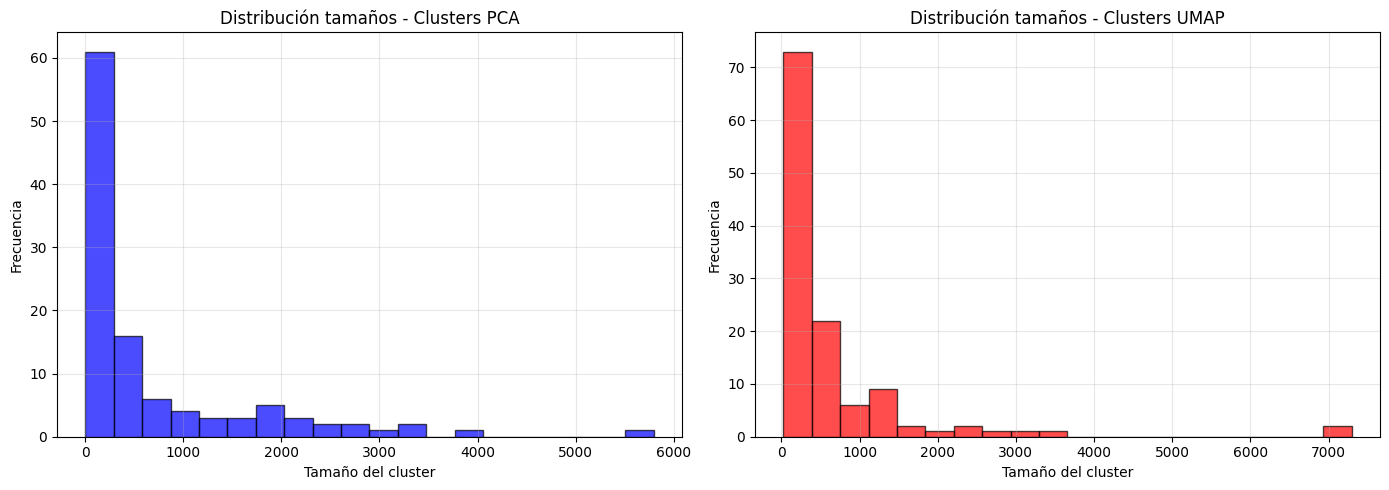


Variables guardadas:
- labels_pca_110: etiquetas clusters PCA
- labels_umap_120: etiquetas clusters UMAP


In [22]:
# Aplicar los mejores modelos de clustering encontrados
best_kmeans_pca = KMeans(n_clusters=110, random_state=42, n_init=10)
labels_pca_110 = best_kmeans_pca.fit_predict(X_pca_95)

best_kmeans_umap = KMeans(n_clusters=120, random_state=42, n_init=10)
labels_umap_120 = best_kmeans_umap.fit_predict(X_umap_95)

# Recalcular las proyecciones 2D si es necesario
pca_2d = PCA(n_components=2, random_state=42)
df_pca_2d = pca_2d.fit_transform(df_scaled)

tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30)
df_tsne_2d = tsne_2d.fit_transform(df_scaled)

umap_2d = umap.UMAP(n_components=2, random_state=42)
df_umap_2d = umap_2d.fit_transform(df_scaled)

# Visualizar clusters PCA (k=110)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA 2D con clusters de PCA
scatter1 = axes[0].scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], 
                          c=labels_pca_110, cmap='tab20', alpha=0.6, s=3)
axes[0].set_title('PCA 2D - Clusters PCA (k=110)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, alpha=0.3)

# t-SNE 2D con clusters de PCA
scatter2 = axes[1].scatter(df_tsne_2d[:, 0], df_tsne_2d[:, 1], 
                          c=labels_pca_110, cmap='tab20', alpha=0.6, s=3)
axes[1].set_title('t-SNE 2D - Clusters PCA (k=110)')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].grid(True, alpha=0.3)

# UMAP 2D con clusters de PCA
scatter3 = axes[2].scatter(df_umap_2d[:, 0], df_umap_2d[:, 1], 
                          c=labels_pca_110, cmap='tab20', alpha=0.6, s=3)
axes[2].set_title('UMAP 2D - Clusters PCA (k=110)')
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualizar clusters UMAP (k=120)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA 2D con clusters de UMAP
scatter1 = axes[0].scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], 
                          c=labels_umap_120, cmap='tab20', alpha=0.6, s=3)
axes[0].set_title('PCA 2D - Clusters UMAP (k=120)')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, alpha=0.3)

# t-SNE 2D con clusters de UMAP
scatter2 = axes[1].scatter(df_tsne_2d[:, 0], df_tsne_2d[:, 1], 
                          c=labels_umap_120, cmap='tab20', alpha=0.6, s=3)
axes[1].set_title('t-SNE 2D - Clusters UMAP (k=120)')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].grid(True, alpha=0.3)

# UMAP 2D con clusters de UMAP
scatter3 = axes[2].scatter(df_umap_2d[:, 0], df_umap_2d[:, 1], 
                          c=labels_umap_120, cmap='tab20', alpha=0.6, s=3)
axes[2].set_title('UMAP 2D - Clusters UMAP (k=120)')
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas de clusters
print("ESTADÍSTICAS DE CLUSTERS")
print("-" * 40)

print("Clusters PCA (k=110):")
unique_pca, counts_pca = np.unique(labels_pca_110, return_counts=True)
print(f"Tamaño promedio: {counts_pca.mean():.1f}")
print(f"Tamaño mínimo: {counts_pca.min()}")
print(f"Tamaño máximo: {counts_pca.max()}")
print(f"Desviación estándar: {counts_pca.std():.1f}")

print("\nClusters UMAP (k=120):")
unique_umap, counts_umap = np.unique(labels_umap_120, return_counts=True)
print(f"Tamaño promedio: {counts_umap.mean():.1f}")
print(f"Tamaño mínimo: {counts_umap.min()}")
print(f"Tamaño máximo: {counts_umap.max()}")
print(f"Desviación estándar: {counts_umap.std():.1f}")

# Histograma de tamaños de cluster
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(counts_pca, bins=20, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Distribución tamaños - Clusters PCA')
axes[0].set_xlabel('Tamaño del cluster')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(True, alpha=0.3)

axes[1].hist(counts_umap, bins=20, alpha=0.7, color='red', edgecolor='black')
axes[1].set_title('Distribución tamaños - Clusters UMAP')
axes[1].set_xlabel('Tamaño del cluster')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nVariables guardadas:")
print(f"- labels_pca_110: etiquetas clusters PCA")
print(f"- labels_umap_120: etiquetas clusters UMAP")

Evaluando HDBSCAN en UMAP...
Probando min_cluster_size=20


C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Resultados HDBSCAN:
   min_size  n_clusters  noise_points  noise_ratio  silhouette
0        20         322         12189       0.1629      0.7339

Mejor HDBSCAN: min_size=20, clusters=322, Silhouette=0.7339, Ruido=16.29%


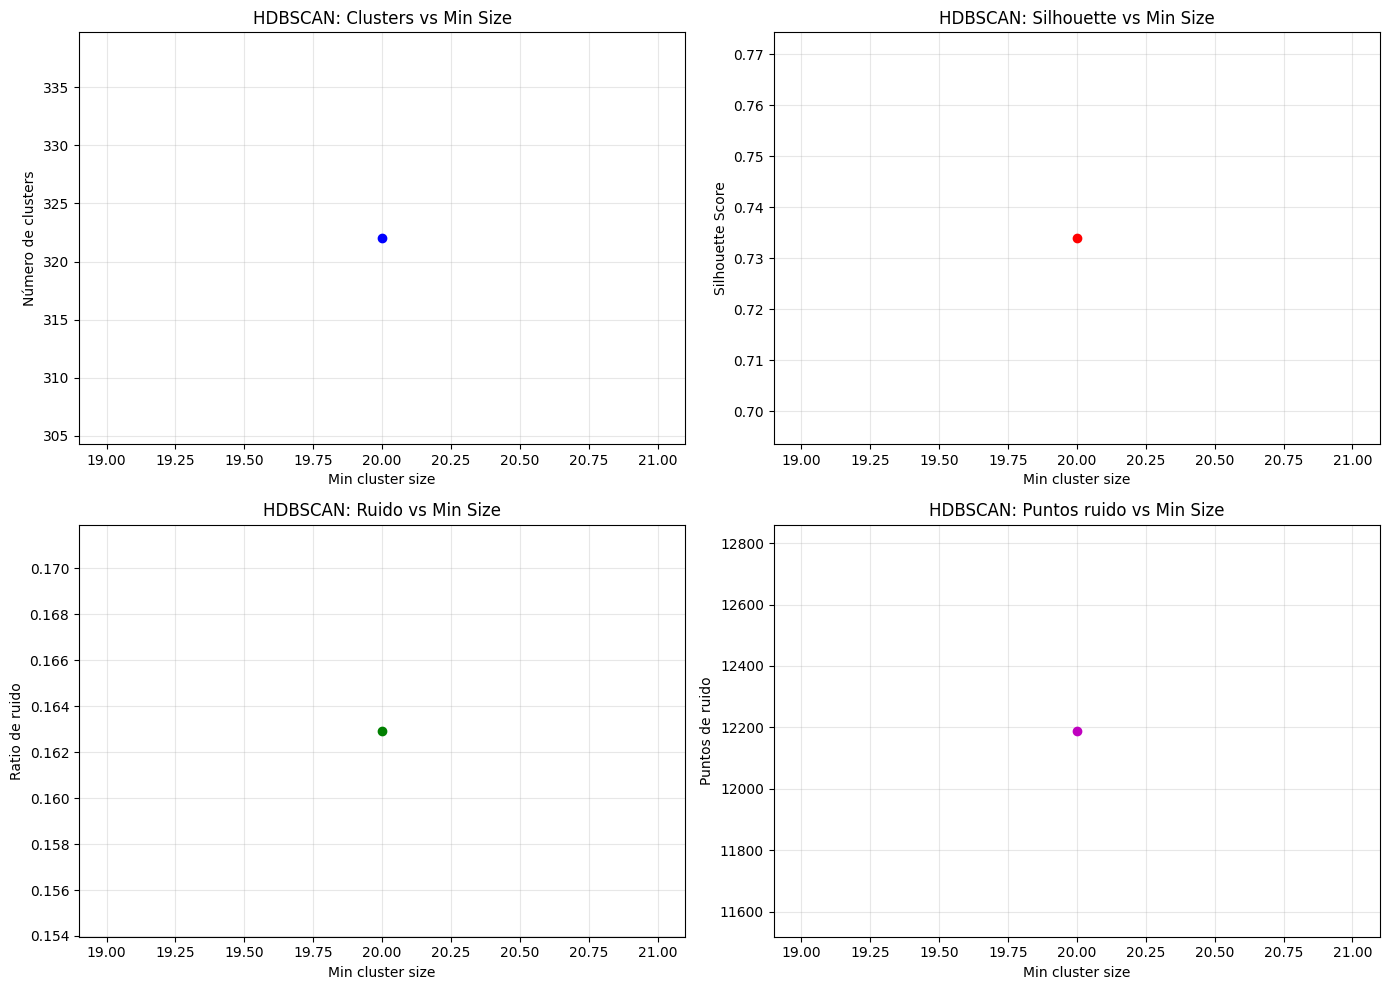

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


TypeError: __init__() got an unexpected keyword argument 'random_state'

In [24]:
from hdbscan import HDBSCAN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# HDBSCAN parameter range
min_cluster_sizes = [20]

# HDBSCAN en UMAP
print("Evaluando HDBSCAN en UMAP...")
hdbscan_results = []

for min_size in min_cluster_sizes:
    print(f"Probando min_cluster_size={min_size}")
    
    hdbscan = HDBSCAN(min_cluster_size=min_size)
    labels = hdbscan.fit_predict(X_umap_95)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_points = np.sum(labels == -1)
    noise_ratio = noise_points / len(labels)
    
    # Silhouette solo si hay clusters válidos
    if n_clusters >= 2:
        mask = labels != -1
        if np.sum(mask) > 1:
            sil_score = silhouette_score(X_umap_95[mask], labels[mask])
        else:
            sil_score = np.nan
    else:
        sil_score = np.nan
    
    hdbscan_results.append({
        'min_size': min_size,
        'n_clusters': n_clusters,
        'noise_points': noise_points,
        'noise_ratio': noise_ratio,
        'silhouette': sil_score,
        'labels': labels
    })

hdbscan_df = pd.DataFrame(hdbscan_results)

# Mostrar resultados
print("\nResultados HDBSCAN:")
print(hdbscan_df[['min_size', 'n_clusters', 'noise_points', 'noise_ratio', 'silhouette']].round(4))

# Mejor configuración por silhouette
valid_results = hdbscan_df.dropna(subset=['silhouette'])
if not valid_results.empty:
    best_hdbscan = valid_results.loc[valid_results['silhouette'].idxmax()]
    print(f"\nMejor HDBSCAN: min_size={int(best_hdbscan['min_size'])}, "
          f"clusters={int(best_hdbscan['n_clusters'])}, "
          f"Silhouette={best_hdbscan['silhouette']:.4f}, "
          f"Ruido={best_hdbscan['noise_ratio']:.2%}")

# Visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Número de clusters vs min_size
axes[0,0].plot(hdbscan_df['min_size'], hdbscan_df['n_clusters'], 'b-o')
axes[0,0].set_xlabel('Min cluster size')
axes[0,0].set_ylabel('Número de clusters')
axes[0,0].set_title('HDBSCAN: Clusters vs Min Size')
axes[0,0].grid(True, alpha=0.3)

# Silhouette score vs min_size
valid_df = hdbscan_df.dropna(subset=['silhouette'])
if not valid_df.empty:
    axes[0,1].plot(valid_df['min_size'], valid_df['silhouette'], 'r-o')
    axes[0,1].set_xlabel('Min cluster size')
    axes[0,1].set_ylabel('Silhouette Score')
    axes[0,1].set_title('HDBSCAN: Silhouette vs Min Size')
    axes[0,1].grid(True, alpha=0.3)

# Ratio de ruido vs min_size
axes[1,0].plot(hdbscan_df['min_size'], hdbscan_df['noise_ratio'], 'g-o')
axes[1,0].set_xlabel('Min cluster size')
axes[1,0].set_ylabel('Ratio de ruido')
axes[1,0].set_title('HDBSCAN: Ruido vs Min Size')
axes[1,0].grid(True, alpha=0.3)

# Puntos de ruido vs min_size
axes[1,1].plot(hdbscan_df['min_size'], hdbscan_df['noise_points'], 'm-o')
axes[1,1].set_xlabel('Min cluster size')
axes[1,1].set_ylabel('Puntos de ruido')
axes[1,1].set_title('HDBSCAN: Puntos ruido vs Min Size')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Guardar mejor modelo
if not valid_results.empty:
    best_min_size = int(best_hdbscan['min_size'])
    best_hdbscan_model = HDBSCAN(min_cluster_size=best_min_size, random_state=42)
    best_hdbscan_labels = best_hdbscan_model.fit_predict(X_umap_95)
    
    print(f"\nVariables guardadas:")
    print(f"- hdbscan_df: resultados completos")
    print(f"- best_hdbscan_labels: mejores etiquetas HDBSCAN")
    print(f"- best_hdbscan_model: mejor modelo HDBSCAN")
else:
    print("No se encontraron configuraciones válidas de HDBSCAN")

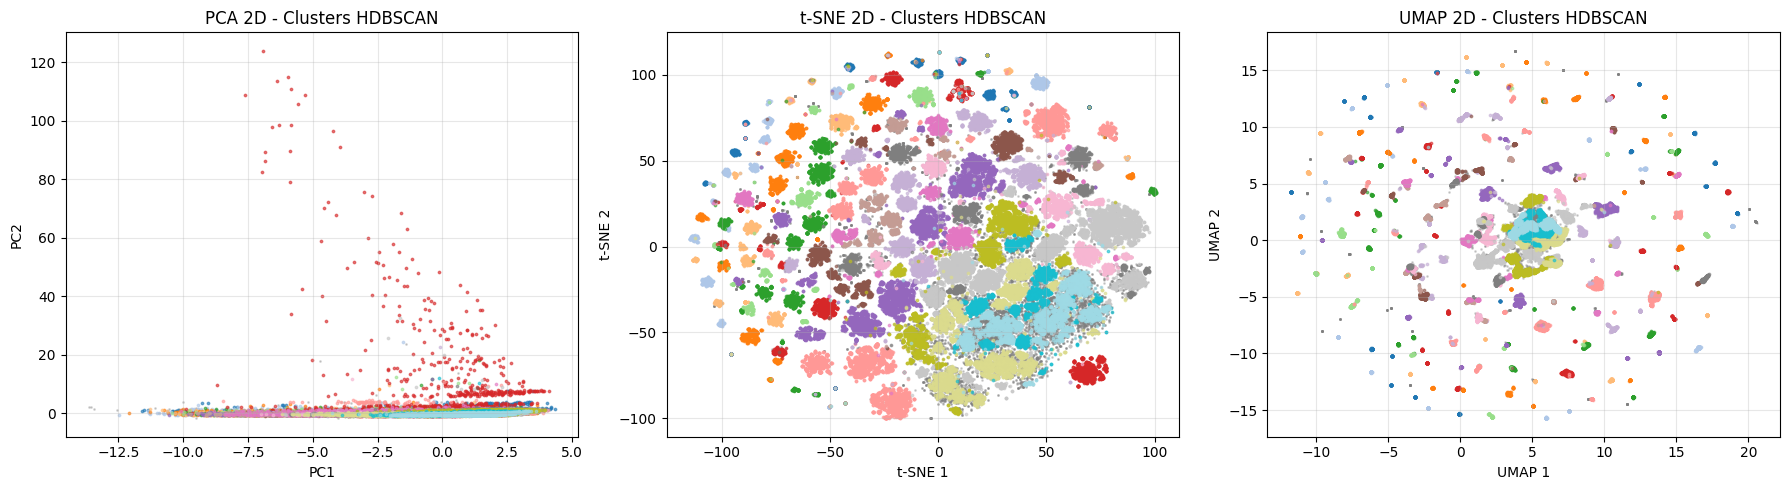

ESTADÍSTICAS CLUSTERS HDBSCAN
----------------------------------------
Clusters encontrados: 322
Puntos de ruido: 12189 (16.3%)
Tamaño promedio cluster: 194.5
Tamaño mínimo: 20
Tamaño máximo: 2205


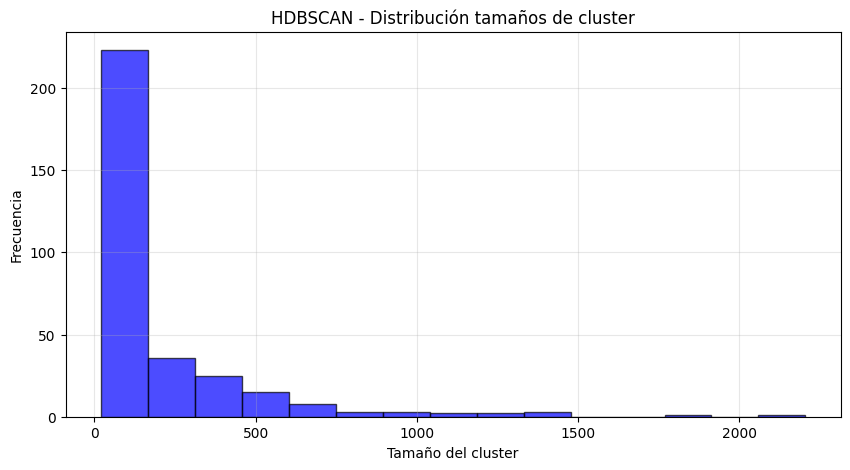


Variable guardada: best_hdbscan_labels


In [29]:
# Obtener las etiquetas HDBSCAN del resultado anterior
best_hdbscan_labels = hdbscan_results[0]['labels']  # Del único resultado que ejecutaste

# Visualizar clusters HDBSCAN
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Crear colormap personalizado (ruido en gris)
unique_labels = np.unique(best_hdbscan_labels)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
color_dict = {label: colors[i] for i, label in enumerate(unique_labels)}
color_dict[-1] = [0.5, 0.5, 0.5, 0.3]  # Gris para ruido

# PCA 2D con clusters HDBSCAN
for label in unique_labels:
    mask = best_hdbscan_labels == label
    if label == -1:
        axes[0].scatter(df_pca_2d[mask, 0], df_pca_2d[mask, 1], 
                       c='gray', alpha=0.3, s=1, label='Ruido')
    else:
        axes[0].scatter(df_pca_2d[mask, 0], df_pca_2d[mask, 1], 
                       c=[color_dict[label]], alpha=0.6, s=3)

axes[0].set_title('PCA 2D - Clusters HDBSCAN')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, alpha=0.3)

# t-SNE 2D con clusters HDBSCAN
for label in unique_labels:
    mask = best_hdbscan_labels == label
    if label == -1:
        axes[1].scatter(df_tsne_2d[mask, 0], df_tsne_2d[mask, 1], 
                       c='gray', alpha=0.3, s=1, label='Ruido')
    else:
        axes[1].scatter(df_tsne_2d[mask, 0], df_tsne_2d[mask, 1], 
                       c=[color_dict[label]], alpha=0.6, s=3)

axes[1].set_title('t-SNE 2D - Clusters HDBSCAN')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].grid(True, alpha=0.3)

# UMAP 2D con clusters HDBSCAN
for label in unique_labels:
    mask = best_hdbscan_labels == label
    if label == -1:
        axes[2].scatter(df_umap_2d[mask, 0], df_umap_2d[mask, 1], 
                       c='gray', alpha=0.3, s=1, label='Ruido')
    else:
        axes[2].scatter(df_umap_2d[mask, 0], df_umap_2d[mask, 1], 
                       c=[color_dict[label]], alpha=0.6, s=3)

axes[2].set_title('UMAP 2D - Clusters HDBSCAN')
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas de clusters HDBSCAN
print("ESTADÍSTICAS CLUSTERS HDBSCAN")
print("-" * 40)

non_noise = best_hdbscan_labels[best_hdbscan_labels != -1]
unique_clusters, counts = np.unique(non_noise, return_counts=True)

print(f"Clusters encontrados: {len(unique_clusters)}")
print(f"Puntos de ruido: {np.sum(best_hdbscan_labels == -1)} ({np.mean(best_hdbscan_labels == -1):.1%})")
print(f"Tamaño promedio cluster: {counts.mean():.1f}")
print(f"Tamaño mínimo: {counts.min()}")
print(f"Tamaño máximo: {counts.max()}")

# Histograma de tamaños
plt.figure(figsize=(10, 5))
plt.hist(counts, bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title('HDBSCAN - Distribución tamaños de cluster')
plt.xlabel('Tamaño del cluster')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nVariable guardada: best_hdbscan_labels")

Evaluando GMM en UMAP...
Probando k=111
Mejor GMM (Silhouette): k=111, Silhouette=0.6682
Mejor GMM (BIC): k=111, BIC=-133075213


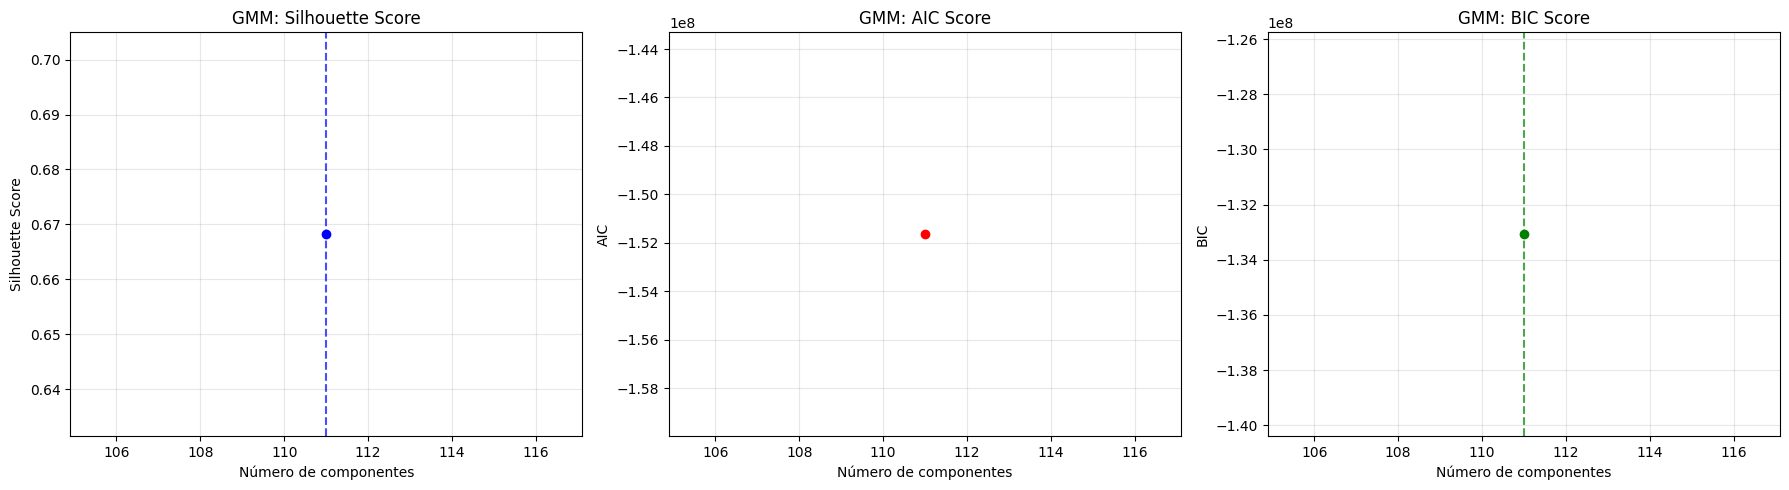


Top 5 GMM (Silhouette):
     k  silhouette           bic
0  111    0.668205 -1.330752e+08

Top 5 GMM (BIC):
     k  silhouette           bic
0  111    0.668205 -1.330752e+08

Variables guardadas:
- gmm_df: resultados completos
- best_gmm_labels: etiquetas mejor GMM
- best_k_gmm: 111


In [32]:
from sklearn.mixture import GaussianMixture

# GMM optimization
k_range = range(111, 120, 10)

# GMM en UMAP
print("Evaluando GMM en UMAP...")
gmm_results = []
for k in k_range:
    print(f"Probando k={k}")
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_umap_95)
    
    sil_score = silhouette_score(X_umap_95, labels)
    aic = gmm.aic(X_umap_95)
    bic = gmm.bic(X_umap_95)
    
    gmm_results.append({
        'k': k, 
        'silhouette': sil_score, 
        'aic': aic, 
        'bic': bic, 
        'labels': labels
    })

gmm_df = pd.DataFrame(gmm_results)

# Mejores configuraciones
best_gmm_sil = gmm_df.loc[gmm_df['silhouette'].idxmax()]
best_gmm_bic = gmm_df.loc[gmm_df['bic'].idxmin()]

print(f"Mejor GMM (Silhouette): k={int(best_gmm_sil['k'])}, Silhouette={best_gmm_sil['silhouette']:.4f}")
print(f"Mejor GMM (BIC): k={int(best_gmm_bic['k'])}, BIC={best_gmm_bic['bic']:.0f}")

# Visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette
axes[0].plot(gmm_df['k'], gmm_df['silhouette'], 'b-o', linewidth=2)
axes[0].axvline(best_gmm_sil['k'], color='blue', linestyle='--', alpha=0.7)
axes[0].set_xlabel('Número de componentes')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('GMM: Silhouette Score')
axes[0].grid(True, alpha=0.3)

# AIC
axes[1].plot(gmm_df['k'], gmm_df['aic'], 'r-o', linewidth=2)
axes[1].set_xlabel('Número de componentes')
axes[1].set_ylabel('AIC')
axes[1].set_title('GMM: AIC Score')
axes[1].grid(True, alpha=0.3)

# BIC
axes[2].plot(gmm_df['k'], gmm_df['bic'], 'g-o', linewidth=2)
axes[2].axvline(best_gmm_bic['k'], color='green', linestyle='--', alpha=0.7)
axes[2].set_xlabel('Número de componentes')
axes[2].set_ylabel('BIC')
axes[2].set_title('GMM: BIC Score')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Top 5 resultados
print("\nTop 5 GMM (Silhouette):")
print(gmm_df.sort_values('silhouette', ascending=False).head()[['k', 'silhouette', 'bic']])

print("\nTop 5 GMM (BIC):")
print(gmm_df.sort_values('bic', ascending=True).head()[['k', 'silhouette', 'bic']])

# Guardar mejor modelo
best_k_gmm = int(best_gmm_sil['k'])
best_gmm_labels = best_gmm_sil['labels']

print(f"\nVariables guardadas:")
print(f"- gmm_df: resultados completos")
print(f"- best_gmm_labels: etiquetas mejor GMM")
print(f"- best_k_gmm: {best_k_gmm}")

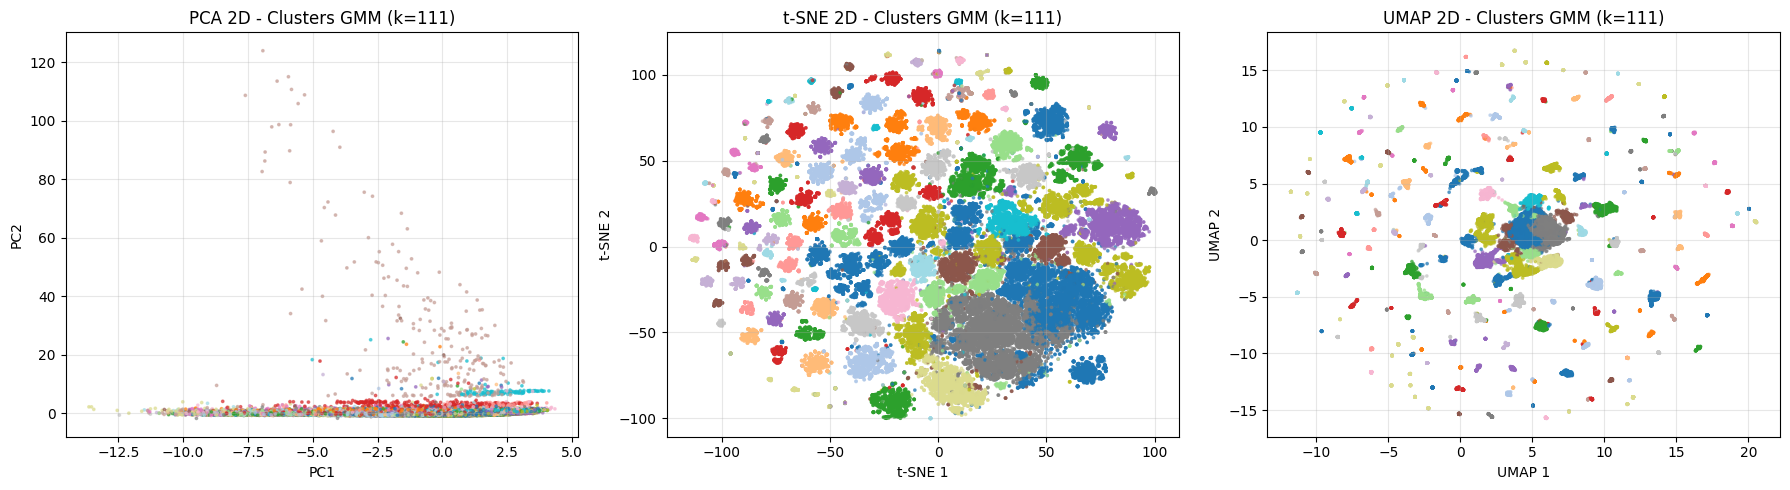

ESTADÍSTICAS CLUSTERS GMM
------------------------------
Clusters: 111
Tamaño promedio: 674.0
Tamaño mínimo: 51
Tamaño máximo: 7767
Silhouette: 0.6682


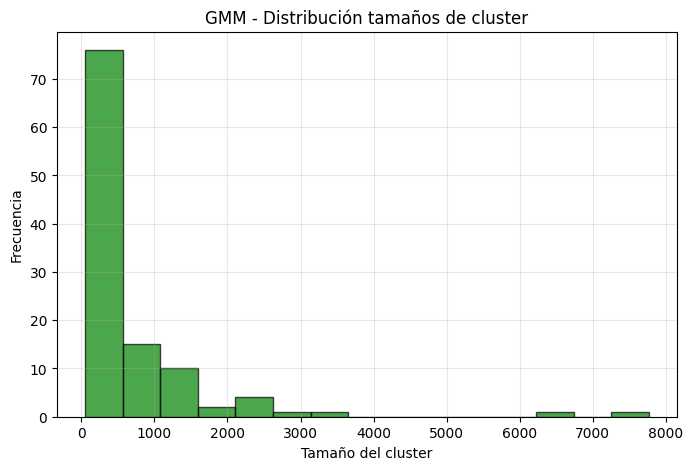

In [33]:
# Obtener etiquetas GMM del mejor resultado
best_gmm_labels = best_gmm_sil['labels']

# Visualizar clusters GMM en 2D
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PCA 2D con clusters GMM
scatter1 = axes[0].scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], 
                          c=best_gmm_labels, cmap='tab20', alpha=0.6, s=3)
axes[0].set_title(f'PCA 2D - Clusters GMM (k={best_k_gmm})')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True, alpha=0.3)

# t-SNE 2D con clusters GMM
scatter2 = axes[1].scatter(df_tsne_2d[:, 0], df_tsne_2d[:, 1], 
                          c=best_gmm_labels, cmap='tab20', alpha=0.6, s=3)
axes[1].set_title(f't-SNE 2D - Clusters GMM (k={best_k_gmm})')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].grid(True, alpha=0.3)

# UMAP 2D con clusters GMM
scatter3 = axes[2].scatter(df_umap_2d[:, 0], df_umap_2d[:, 1], 
                          c=best_gmm_labels, cmap='tab20', alpha=0.6, s=3)
axes[2].set_title(f'UMAP 2D - Clusters GMM (k={best_k_gmm})')
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas clusters GMM
unique_gmm, counts_gmm = np.unique(best_gmm_labels, return_counts=True)

print("ESTADÍSTICAS CLUSTERS GMM")
print("-" * 30)
print(f"Clusters: {len(unique_gmm)}")
print(f"Tamaño promedio: {counts_gmm.mean():.1f}")
print(f"Tamaño mínimo: {counts_gmm.min()}")
print(f"Tamaño máximo: {counts_gmm.max()}")
print(f"Silhouette: {best_gmm_sil['silhouette']:.4f}")

# Distribución de tamaños
plt.figure(figsize=(8, 5))
plt.hist(counts_gmm, bins=15, alpha=0.7, color='green', edgecolor='black')
plt.title('GMM - Distribución tamaños de cluster')
plt.xlabel('Tamaño del cluster')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

TOP 10 CLUSTERS CON MAYOR % DE ACCIDENTES GRAVES (Serious + Fatal)
K-means  | Cluster   4 | Graves: 100.0% | Total:  511 | Serious:   0 | Fatal: 511
HDBSCAN  | Cluster 150 | Graves: 100.0% | Total:   24 | Serious:   0 | Fatal: 24
HDBSCAN  | Cluster 149 | Graves: 100.0% | Total:  477 | Serious:   0 | Fatal: 477
GMM      | Cluster  92 | Graves: 100.0% | Total:  511 | Serious:   0 | Fatal: 511
HDBSCAN  | Cluster 110 | Graves: 100.0% | Total:   43 | Serious:   0 | Fatal: 43
HDBSCAN  | Cluster 172 | Graves:  50.8% | Total:   59 | Serious:  30 | Fatal:  0
HDBSCAN  | Cluster 141 | Graves:  47.4% | Total:  154 | Serious:  58 | Fatal: 15
HDBSCAN  | Cluster 169 | Graves:  45.2% | Total:   42 | Serious:  19 | Fatal:  0
K-means  | Cluster 110 | Graves:  39.2% | Total:   51 | Serious:  18 | Fatal:  2
HDBSCAN  | Cluster  18 | Graves:  39.2% | Total:   51 | Serious:  18 | Fatal:  2

DISTRIBUCIÓN GENERAL:
K-means : Avg graves: 19.0% | Max: 100.0% | Clusters >20% graves: 41
HDBSCAN : Avg graves: 17.2% 

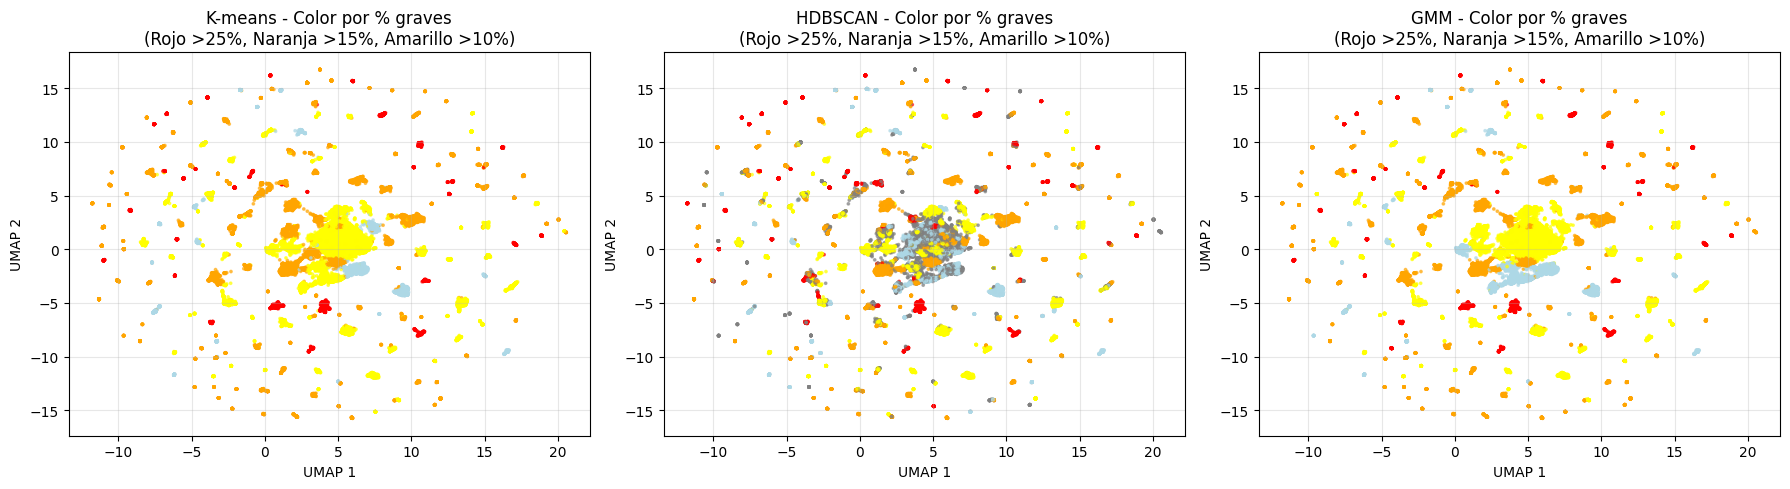


Variables guardadas:
- all_analysis: análisis completo de clusters
- high_severe_clusters: clusters con alta concentración de graves


In [34]:
# Obtener las etiquetas de gravedad
labels_severity = subset_30.loc[df_cleaned.index, 'Accident_Severity']

# Analizar composición de clusters por gravedad para cada método
def analyze_clusters_by_severity(cluster_labels, method_name):
    results = []
    unique_clusters = np.unique(cluster_labels)
    
    for cluster in unique_clusters:
        if cluster == -1:  # Skip noise for HDBSCAN
            continue
            
        mask = cluster_labels == cluster
        cluster_severities = labels_severity[mask]
        
        total = len(cluster_severities)
        slight = np.sum(cluster_severities == 'Slight')
        serious = np.sum(cluster_severities == 'Serious') 
        fatal = np.sum(cluster_severities == 'Fatal')
        
        # Porcentajes de accidentes graves (Serious + Fatal)
        severe_pct = (serious + fatal) / total * 100
        
        results.append({
            'method': method_name,
            'cluster': cluster,
            'total': total,
            'slight': slight,
            'serious': serious,
            'fatal': fatal,
            'slight_pct': slight/total*100,
            'serious_pct': serious/total*100,
            'fatal_pct': fatal/total*100,
            'severe_pct': severe_pct
        })
    
    return pd.DataFrame(results)

# Analizar cada método
kmeans_analysis = analyze_clusters_by_severity(labels_umap_120, 'K-means')
hdbscan_analysis = analyze_clusters_by_severity(best_hdbscan_labels, 'HDBSCAN')
gmm_analysis = analyze_clusters_by_severity(best_gmm_labels, 'GMM')

# Combinar resultados
all_analysis = pd.concat([kmeans_analysis, hdbscan_analysis, gmm_analysis])

# Top clusters con mayor concentración de accidentes graves
print("TOP 10 CLUSTERS CON MAYOR % DE ACCIDENTES GRAVES (Serious + Fatal)")
print("="*70)
top_severe = all_analysis.sort_values('severe_pct', ascending=False).head(10)
for _, row in top_severe.iterrows():
    print(f"{row['method']:8} | Cluster {row['cluster']:3.0f} | "
          f"Graves: {row['severe_pct']:5.1f}% | "
          f"Total: {row['total']:4.0f} | "
          f"Serious: {row['serious']:3.0f} | Fatal: {row['fatal']:2.0f}")

# Distribución general por método
print(f"\nDISTRIBUCIÓN GENERAL:")
print("="*40)
for method in ['K-means', 'HDBSCAN', 'GMM']:
    method_data = all_analysis[all_analysis['method'] == method]
    avg_severe = method_data['severe_pct'].mean()
    max_severe = method_data['severe_pct'].max()
    clusters_high_severe = len(method_data[method_data['severe_pct'] > 20])
    
    print(f"{method:8}: Avg graves: {avg_severe:4.1f}% | "
          f"Max: {max_severe:4.1f}% | "
          f"Clusters >20% graves: {clusters_high_severe}")

# Analizar características de clusters con alta concentración de graves
threshold = 25  # clusters con >25% accidentes graves
high_severe_clusters = all_analysis[all_analysis['severe_pct'] > threshold]

print(f"\nCLUSTERS CON >{threshold}% ACCIDENTES GRAVES:")
print("="*50)

for _, cluster_info in high_severe_clusters.iterrows():
    method = cluster_info['method']
    cluster_id = int(cluster_info['cluster'])
    
    print(f"\n{method} - Cluster {cluster_id} ({cluster_info['severe_pct']:.1f}% graves)")
    
    # Obtener máscara para este cluster
    if method == 'K-means':
        mask = labels_umap_120 == cluster_id
    elif method == 'HDBSCAN':
        mask = best_hdbscan_labels == cluster_id
    elif method == 'GMM':
        mask = best_gmm_labels == cluster_id
    
    # Obtener datos originales de este cluster
    cluster_data = df_cleaned[mask]
    
    # Analizar características principales (top variables no-zero)
    cluster_mean = cluster_data.mean()
    overall_mean = df_cleaned.mean()
    
    # Diferencias más significativas
    diff = (cluster_mean - overall_mean).abs().sort_values(ascending=False)
    top_features = diff.head(10)
    
    print("  Top características distintivas:")
    for feature, diff_val in top_features.items():
        cluster_val = cluster_mean[feature]
        overall_val = overall_mean[feature]
        print(f"    {feature[:30]:30}: {cluster_val:.3f} vs {overall_val:.3f}")

# Visualización de clusters con alta concentración de graves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

methods = ['K-means', 'HDBSCAN', 'GMM']
cluster_labels_list = [labels_umap_120, best_hdbscan_labels, best_gmm_labels]

for i, (method, cluster_labels) in enumerate(zip(methods, cluster_labels_list)):
    method_analysis = all_analysis[all_analysis['method'] == method]
    
    # Crear colores basados en % de accidentes graves
    colors = []
    for label in cluster_labels:
        if label == -1:  # Ruido
            colors.append('gray')
        else:
            severe_pct = method_analysis[method_analysis['cluster'] == label]['severe_pct'].iloc[0]
            if severe_pct > 25:
                colors.append('red')
            elif severe_pct > 15:
                colors.append('orange') 
            elif severe_pct > 10:
                colors.append('yellow')
            else:
                colors.append('lightblue')
    
    axes[i].scatter(df_umap_2d[:, 0], df_umap_2d[:, 1], c=colors, alpha=0.6, s=3)
    axes[i].set_title(f'{method} - Color por % graves\n(Rojo >25%, Naranja >15%, Amarillo >10%)')
    axes[i].set_xlabel('UMAP 1')
    axes[i].set_ylabel('UMAP 2')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nVariables guardadas:")
print(f"- all_analysis: análisis completo de clusters")
print(f"- high_severe_clusters: clusters con alta concentración de graves")

TOP 10 CLUSTERS CON MAYOR % DE ACCIDENTES FATALES
HDBSCAN  | Cluster 149 | Fatal: 100.0% | Total:  477 | Fatal count: 477
HDBSCAN  | Cluster 150 | Fatal: 100.0% | Total:   24 | Fatal count: 24
HDBSCAN  | Cluster 110 | Fatal: 100.0% | Total:   43 | Fatal count: 43
GMM      | Cluster  92 | Fatal: 100.0% | Total:  511 | Fatal count: 511
K-means  | Cluster   4 | Fatal: 100.0% | Total:  511 | Fatal count: 511
HDBSCAN  | Cluster   4 | Fatal:  13.0% | Total:   23 | Fatal count:  3
HDBSCAN  | Cluster 134 | Fatal:  11.1% | Total:   36 | Fatal count:  4
HDBSCAN  | Cluster  83 | Fatal:  10.7% | Total:   28 | Fatal count:  3
HDBSCAN  | Cluster  25 | Fatal:  10.2% | Total:  127 | Fatal count: 13
K-means  | Cluster  70 | Fatal:  10.2% | Total:  127 | Fatal count: 13

TOP 10 CLUSTERS CON MAYOR % DE ACCIDENTES GRAVES (Serious + Fatal)
K-means  | Cluster   4 | Graves: 100.0% | Total:  511 | Serious:   0 | Fatal: 511
HDBSCAN  | Cluster 150 | Graves: 100.0% | Total:   24 | Serious:   0 | Fatal: 24
HDBSCA

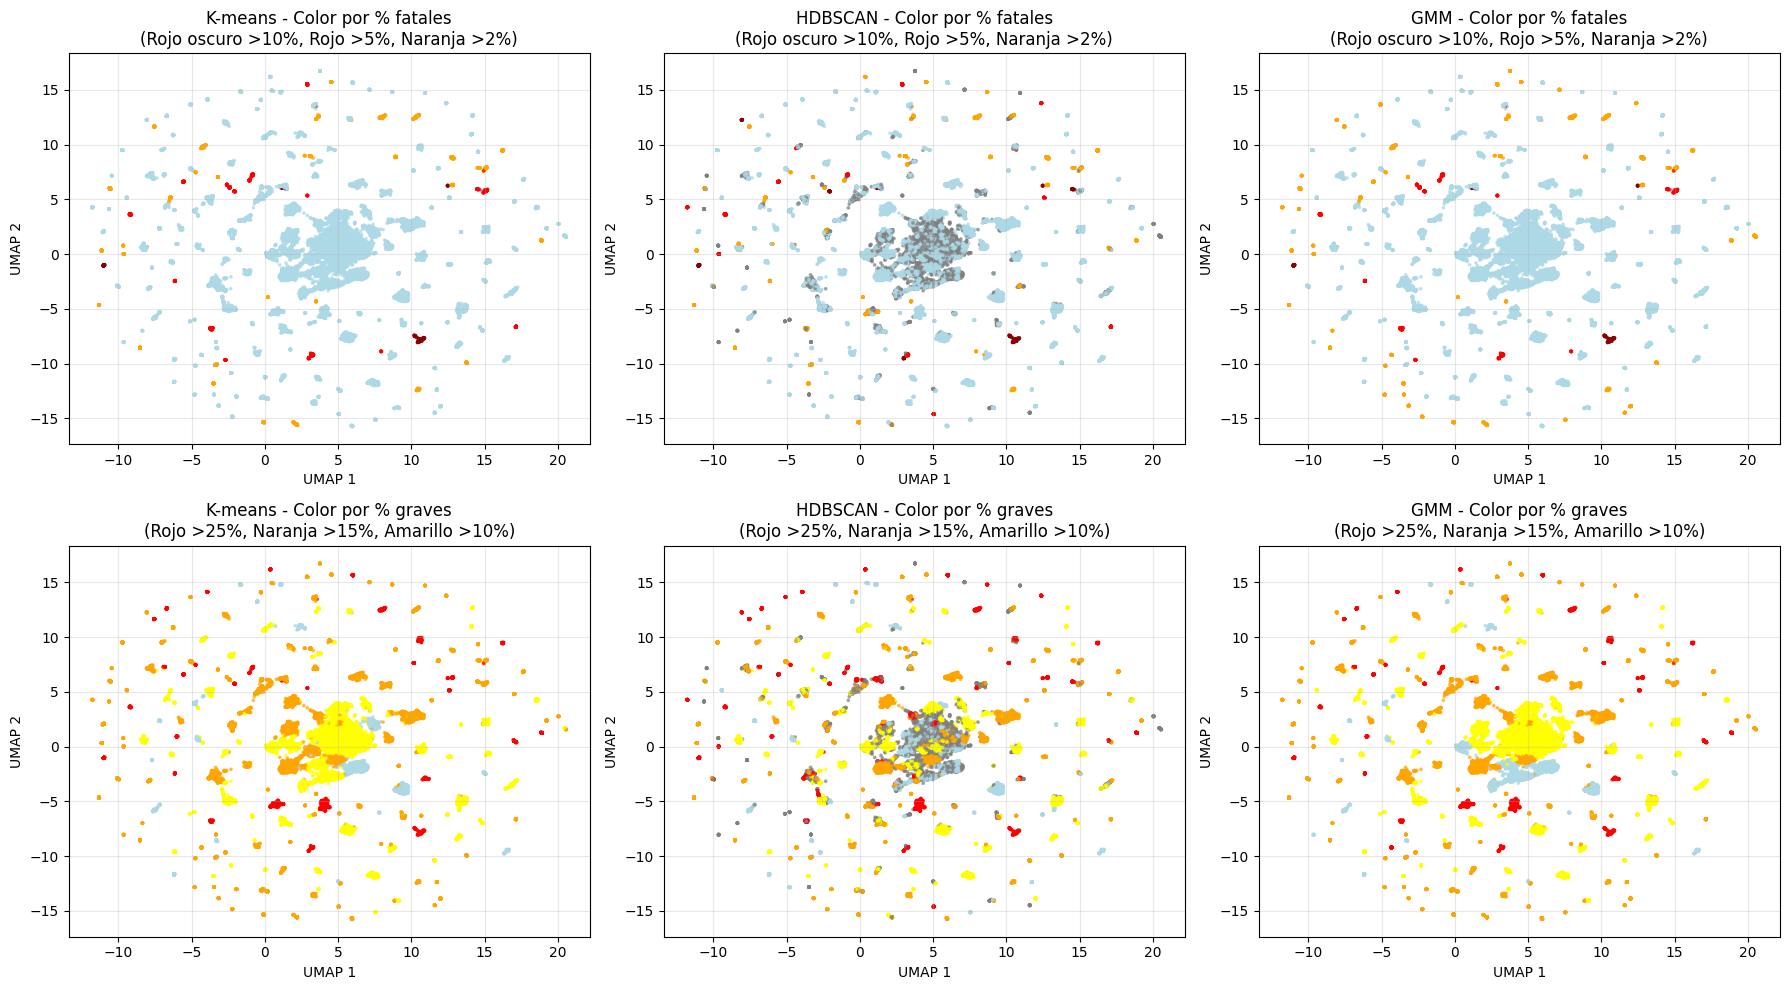


Variables guardadas:
- all_analysis: análisis completo de clusters
- high_fatal_clusters: clusters con alta concentración de fatales
- high_severe_clusters: clusters con alta concentración de graves


In [35]:
# Obtener las etiquetas de gravedad
labels_severity = subset_30.loc[df_cleaned.index, 'Accident_Severity']

# Analizar composición de clusters por gravedad para cada método
def analyze_clusters_by_severity(cluster_labels, method_name):
    results = []
    unique_clusters = np.unique(cluster_labels)
    
    for cluster in unique_clusters:
        if cluster == -1:  # Skip noise for HDBSCAN
            continue
            
        mask = cluster_labels == cluster
        cluster_severities = labels_severity[mask]
        
        total = len(cluster_severities)
        slight = np.sum(cluster_severities == 'Slight')
        serious = np.sum(cluster_severities == 'Serious') 
        fatal = np.sum(cluster_severities == 'Fatal')
        
        # Porcentajes de accidentes graves (Serious + Fatal)
        severe_pct = (serious + fatal) / total * 100
        
        results.append({
            'method': method_name,
            'cluster': cluster,
            'total': total,
            'slight': slight,
            'serious': serious,
            'fatal': fatal,
            'slight_pct': slight/total*100,
            'serious_pct': serious/total*100,
            'fatal_pct': fatal/total*100,
            'severe_pct': severe_pct
        })
    
    return pd.DataFrame(results)

# Analizar cada método
kmeans_analysis = analyze_clusters_by_severity(labels_umap_120, 'K-means')
hdbscan_analysis = analyze_clusters_by_severity(best_hdbscan_labels, 'HDBSCAN')
gmm_analysis = analyze_clusters_by_severity(best_gmm_labels, 'GMM')

# Combinar resultados
all_analysis = pd.concat([kmeans_analysis, hdbscan_analysis, gmm_analysis])

# Top clusters con mayor concentración de accidentes fatales
print("TOP 10 CLUSTERS CON MAYOR % DE ACCIDENTES FATALES")
print("="*60)
top_fatal = all_analysis.sort_values('fatal_pct', ascending=False).head(10)
for _, row in top_fatal.iterrows():
    print(f"{row['method']:8} | Cluster {row['cluster']:3.0f} | "
          f"Fatal: {row['fatal_pct']:5.1f}% | "
          f"Total: {row['total']:4.0f} | "
          f"Fatal count: {row['fatal']:2.0f}")

# También mostrar graves para comparación
print("\nTOP 10 CLUSTERS CON MAYOR % DE ACCIDENTES GRAVES (Serious + Fatal)")
print("="*70)
top_severe = all_analysis.sort_values('severe_pct', ascending=False).head(10)
for _, row in top_severe.iterrows():
    print(f"{row['method']:8} | Cluster {row['cluster']:3.0f} | "
          f"Graves: {row['severe_pct']:5.1f}% | "
          f"Total: {row['total']:4.0f} | "
          f"Serious: {row['serious']:3.0f} | Fatal: {row['fatal']:2.0f}")

# Distribución general por método
print(f"\nDISTRIBUCIÓN GENERAL:")
print("="*40)
for method in ['K-means', 'HDBSCAN', 'GMM']:
    method_data = all_analysis[all_analysis['method'] == method]
    avg_severe = method_data['severe_pct'].mean()
    max_severe = method_data['severe_pct'].max()
    clusters_high_severe = len(method_data[method_data['severe_pct'] > 20])
    
    print(f"{method:8}: Avg graves: {avg_severe:4.1f}% | "
          f"Max: {max_severe:4.1f}% | "
          f"Clusters >20% graves: {clusters_high_severe}")

# Analizar características de clusters con alta concentración de fatales
threshold_fatal = 5  # clusters con >5% accidentes fatales
high_fatal_clusters = all_analysis[all_analysis['fatal_pct'] > threshold_fatal]

print(f"\nCLUSTERS CON >{threshold_fatal}% ACCIDENTES FATALES:")
print("="*45)

for _, cluster_info in high_fatal_clusters.iterrows():
    method = cluster_info['method']
    cluster_id = int(cluster_info['cluster'])
    
    print(f"\n{method} - Cluster {cluster_id} ({cluster_info['fatal_pct']:.1f}% fatales)")
    
    # Obtener máscara para este cluster
    if method == 'K-means':
        mask = labels_umap_120 == cluster_id
    elif method == 'HDBSCAN':
        mask = best_hdbscan_labels == cluster_id
    elif method == 'GMM':
        mask = best_gmm_labels == cluster_id
    
    # Obtener datos originales de este cluster
    cluster_data = df_cleaned[mask]
    
    # Analizar características principales
    cluster_mean = cluster_data.mean()
    overall_mean = df_cleaned.mean()
    
    # Diferencias más significativas
    diff = (cluster_mean - overall_mean).abs().sort_values(ascending=False)
    top_features = diff.head(10)
    
    print("  Top características distintivas:")
    for feature, diff_val in top_features.items():
        cluster_val = cluster_mean[feature]
        overall_val = overall_mean[feature]
        print(f"    {feature[:30]:30}: {cluster_val:.3f} vs {overall_val:.3f}")

# También analizar graves para comparación
threshold_severe = 25  # clusters con >25% accidentes graves
high_severe_clusters = all_analysis[all_analysis['severe_pct'] > threshold_severe]

print(f"\nCLUSTERS CON >{threshold_severe}% ACCIDENTES GRAVES:")
print("="*50)

for _, cluster_info in high_severe_clusters.iterrows():
    method = cluster_info['method']
    cluster_id = int(cluster_info['cluster'])
    
    print(f"\n{method} - Cluster {cluster_id} ({cluster_info['severe_pct']:.1f}% graves)")
    
    # Obtener máscara para este cluster
    if method == 'K-means':
        mask = labels_umap_120 == cluster_id
    elif method == 'HDBSCAN':
        mask = best_hdbscan_labels == cluster_id
    elif method == 'GMM':
        mask = best_gmm_labels == cluster_id
    
    # Obtener datos originales de este cluster
    cluster_data = df_cleaned[mask]
    
    # Analizar características principales (top variables no-zero)
    cluster_mean = cluster_data.mean()
    overall_mean = df_cleaned.mean()
    
    # Diferencias más significativas
    diff = (cluster_mean - overall_mean).abs().sort_values(ascending=False)
    top_features = diff.head(10)
    
    print("  Top características distintivas:")
    for feature, diff_val in top_features.items():
        cluster_val = cluster_mean[feature]
        overall_val = overall_mean[feature]
        print(f"    {feature[:30]:30}: {cluster_val:.3f} vs {overall_val:.3f}")

# Visualización de clusters con alta concentración de fatales y graves
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

methods = ['K-means', 'HDBSCAN', 'GMM']
cluster_labels_list = [labels_umap_120, best_hdbscan_labels, best_gmm_labels]

# Primera fila: clusters por % fatales
for i, (method, cluster_labels) in enumerate(zip(methods, cluster_labels_list)):
    method_analysis = all_analysis[all_analysis['method'] == method]
    
    colors = []
    for label in cluster_labels:
        if label == -1:  # Ruido
            colors.append('gray')
        else:
            fatal_pct = method_analysis[method_analysis['cluster'] == label]['fatal_pct'].iloc[0]
            if fatal_pct > 10:
                colors.append('darkred')
            elif fatal_pct > 5:
                colors.append('red')
            elif fatal_pct > 2:
                colors.append('orange')
            else:
                colors.append('lightblue')
    
    axes[0,i].scatter(df_umap_2d[:, 0], df_umap_2d[:, 1], c=colors, alpha=0.6, s=3)
    axes[0,i].set_title(f'{method} - Color por % fatales\n(Rojo oscuro >10%, Rojo >5%, Naranja >2%)')
    axes[0,i].set_xlabel('UMAP 1')
    axes[0,i].set_ylabel('UMAP 2')
    axes[0,i].grid(True, alpha=0.3)

# Segunda fila: clusters por % graves
for i, (method, cluster_labels) in enumerate(zip(methods, cluster_labels_list)):
    method_analysis = all_analysis[all_analysis['method'] == method]
    
    colors = []
    for label in cluster_labels:
        if label == -1:  # Ruido
            colors.append('gray')
        else:
            severe_pct = method_analysis[method_analysis['cluster'] == label]['severe_pct'].iloc[0]
            if severe_pct > 25:
                colors.append('red')
            elif severe_pct > 15:
                colors.append('orange') 
            elif severe_pct > 10:
                colors.append('yellow')
            else:
                colors.append('lightblue')
    
    axes[1,i].scatter(df_umap_2d[:, 0], df_umap_2d[:, 1], c=colors, alpha=0.6, s=3)
    axes[1,i].set_title(f'{method} - Color por % graves\n(Rojo >25%, Naranja >15%, Amarillo >10%)')
    axes[1,i].set_xlabel('UMAP 1')
    axes[1,i].set_ylabel('UMAP 2')
    axes[1,i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nVariables guardadas:")
print(f"- all_analysis: análisis completo de clusters")
print(f"- high_fatal_clusters: clusters con alta concentración de fatales")
print(f"- high_severe_clusters: clusters con alta concentración de graves")